Importing the Dependencies

In [1]:
import os

In [18]:
print(os.chdir("credit_risk_dataset.csv"))

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'credit_risk_dataset.csv'

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
loan_dataset = pd.read_csv('credit_risk_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'credit_risk_dataset.csv'

Data Collection and Processing

In [6]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [7]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,1


In [8]:
loan_dataset.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0
32580,66,42000,RENT,2.0,MEDICAL,B,6475,0


In [9]:
# number of rows and columns
loan_dataset.shape

(32581, 8)

In [10]:
# statistical measures
loan_dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_status
count,32581.000000,3.258100e+04,31686.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,0.218164
std,6.348078,6.198312e+04,4.142630,6322.086646,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,1.000000


In [11]:
# number of missing values in each column
loan_dataset.isnull().sum()

person_age                 0
person_income              0
person_home_ownership      0
person_emp_length        895
loan_intent                0
loan_grade                 0
loan_amnt                  0
loan_status                0
dtype: int64

In [12]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [13]:
# number of missing values in each column
loan_dataset.isnull().sum()

person_age               0
person_income            0
person_home_ownership    0
person_emp_length        0
loan_intent              0
loan_grade               0
loan_amnt                0
loan_status              0
dtype: int64

In [14]:
loan_dataset['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [15]:
# label encoding
loan_dataset.replace({"loan_intent":{'PERSONAL':0,'EDUCATION':1,'MEDICAL':2,'VENTURE':3,'HOMEIMPROVEMENT':4,'DEBTCONSOLIDATION':5}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [16]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status
0,22,59000,RENT,123.0,0,D,35000,1
1,21,9600,OWN,5.0,1,B,1000,0
2,25,9600,MORTGAGE,1.0,2,C,5500,1
3,23,65500,RENT,4.0,2,C,35000,1
4,24,54400,RENT,8.0,2,C,35000,1


In [17]:
loan_dataset['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [18]:
loan_dataset.replace({"person_home_ownership":{'RENT':0,'OWN':1,'MORTGAGE':2,'OTHER':3}},inplace=True)

In [19]:
loan_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status
0,22,59000,0,123.0,0,D,35000,1
1,21,9600,1,5.0,1,B,1000,0
2,25,9600,2,1.0,2,C,5500,1
3,23,65500,0,4.0,2,C,35000,1
4,24,54400,0,8.0,2,C,35000,1


In [20]:
df1 = loan_dataset.drop('loan_grade',axis='columns')
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_status
0,22,59000,0,123.0,0,35000,1
1,21,9600,1,5.0,1,1000,0
2,25,9600,2,1.0,2,5500,1
3,23,65500,0,4.0,2,35000,1
4,24,54400,0,8.0,2,35000,1


In [21]:
print(df1.apply(lambda row: row["person_emp_length"],axis=1))

0        123.0
1          5.0
2          1.0
3          4.0
4          8.0
         ...  
32576      1.0
32577      4.0
32578      3.0
32579      5.0
32580      2.0
Length: 31686, dtype: float64


Data Visualization

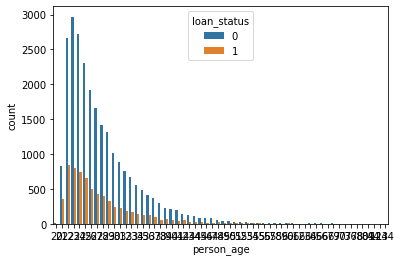

In [22]:
# education & Loan Status
sns.countplot(x='person_age',hue='loan_status',data=df1)

In [23]:
import matplotlib.pyplot as plt

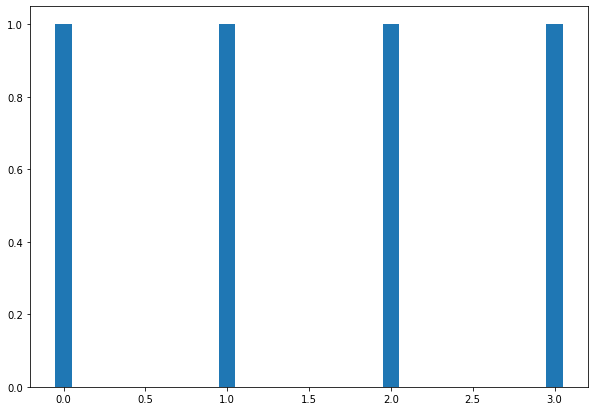

In [24]:
fig = plt.figure(figsize =(10, 7))
x = df1['person_home_ownership']
y = df1['loan_status']
plt.bar(x,y,data=df1,width=0.1)
plt.show()

In [25]:
# separating the data and label
X = df1.drop(columns=['person_emp_length','loan_status'],axis=1)
X

,person_age,person_income,person_home_ownership,loan_intent,loan_amnt
0,22,59000,0,0,35000
1,21,9600,1,1,1000
2,25,9600,2,2,5500
3,23,65500,0,2,35000
4,24,54400,0,2,35000
...,...,...,...,...,...
32576,57,53000,2,0,5800
32577,54,120000,2,0,17625
32578,65,76000,0,4,35000
32579,56,150000,2,0,15000


In [26]:
Y = df1['loan_status']
Y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 31686, dtype: int64

Train Test Split

In [43]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(31686, 5) (25348, 5) (6338, 5)


# Training the model:



Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, Y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [30]:
y_pred= classifier.predict(X_test)  

In [31]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [32]:
print('Accuracy on test data : ', training_data_accuray )

Accuracy on test data :  0.9820498658671295


In [33]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [34]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8736194383086147


In [35]:
X_test_prediction = classifier.predict(X_test)
X_test_prediction

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
X_test

,person_age,person_income,person_home_ownership,loan_intent,loan_amnt
22156,30,52800,2,3,15000
7242,26,52000,2,3,6500
25071,34,30412,0,2,12000
6251,23,30000,0,5,6000
10286,22,81960,0,0,9600
...,...,...,...,...,...
13511,26,34656,1,0,5500
14524,26,109000,2,0,15000
3860,26,38904,2,4,10000
29347,36,23004,1,3,12000


In [37]:
Y_test

22156    0
7242     0
25071    1
6251     0
10286    0
        ..
13511    0
14524    0
3860     0
29347    0
28489    0
Name: loan_status, Length: 6338, dtype: int64

# NN Classifier

In [79]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(50,100,200,100,50), max_iter=1200,activation = 'relu',solver='adam')
classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(50, 100, 200, 100, 50), max_iter=1200)

In [80]:
y_pred= classifier.predict(X_test)
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [81]:
print('Accuracy on test data : ', training_data_accuray )

Accuracy on test data :  0.8230235127031719


In [82]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8253392237298832


# XGBoost

In [58]:
from xgboost import XGBClassifier

In [59]:
X_train, X_test,Y_train,Y_test = train_test_split(X.values,Y.values,test_size=0.2,stratify=Y,random_state=2)

In [60]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier()

In [61]:
y_pred= model.predict(X_test)  

In [63]:
X_train_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [64]:
print('Accuracy on test data : ', training_data_accuray )

Accuracy on test data :  0.8741123560044185


In [66]:
X_test_prediction = model.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8710949826443674


# Pickle

In [41]:
helloo

NameError: ignored

In [ ]:
import pickle

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
plt.scatter(Y_test,y_pred);

In [ ]:
pickle.dump(classifier, open('Loan.pickle','wb'))

In [ ]:
X.columns

In [ ]:
def pre(person_age,person_income,person_home_ownership,loan_intent,loan_amnt):
  x = np.zeros(len(X.columns))

  x[0] = person_age
  x[1] = person_income
  x[2] = person_home_ownership
  x[3] = loan_intent
  x[4] = loan_amnt

  model1 = pickle.load(open('Loan.pickle','rb'))

  return print(model1.predict([x])[0])

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
pre(22,59000,0,0,35000)